# Clustering 

*Since clustering is an unsupervised learning task and does not depend on labeled data, we should first remove the class label from our dataset.*

In [352]:
import pandas as pd
df = pd.read_csv('Dataset/processed_data.csv')

# Extract the features (excluding the target variable, if any)
processd_No_classLabel_data = df.drop(df.columns[-1] , axis=1)

### Encoding for Age column 

We have applied encoding for the Age column because previously in our preprocessing step and after applying discretization we have made them into intervals, where in clustering algorithms will deal with age now as String which will cause an error for and need to be encoded tp take numeric values.

In [356]:
from sklearn.preprocessing import LabelEncoder

# encoding CAEC and CALC uniformly
encoding_mapping = {'10-15': 0, '16-20': 1, '21-25': 2 , '26-30' : 3 , '31+' : 4}

processd_No_classLabel_data.loc[:,'Age'] = processd_No_classLabel_data['Age'].map(encoding_mapping)

In [358]:
processd_No_classLabel_data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,4,1,0.580136,0.665097,1.0,1,2.967300,3.0,0,0,2.530035,1,0.955317,1.339232,1.0,0
1,1,1,0.570708,0.500265,0.0,1,2.000000,3.0,0,0,2.000000,1,2.000000,0.000000,2.0,3
2,1,0,0.012072,0.135510,1.0,1,2.000000,3.0,1,0,1.040342,0,0.497373,1.783319,1.0,3
3,2,1,0.285354,0.090212,1.0,0,2.000000,3.0,0,0,1.000000,0,0.000000,0.000000,1.0,3
4,4,0,0.209260,0.073810,1.0,0,2.000000,3.0,0,0,2.000000,1,1.000000,0.000000,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2,0,0.544484,0.763893,1.0,1,3.000000,3.0,0,0,1.657541,1,1.672639,0.629285,1.0,3
997,2,1,0.551684,0.446958,2.0,1,2.000000,3.0,0,1,1.000000,0,1.000000,1.000000,2.0,0
998,1,0,0.723026,0.037188,1.0,1,2.945967,3.0,0,0,2.953192,0,2.830911,1.466667,1.0,3
999,1,0,0.669598,0.812189,1.0,1,3.000000,3.0,0,0,2.691591,1,1.168368,0.735372,1.0,3


### Scaling Features

We decided not to apply scaling to our data before performing K-means clustering because all attributes have values within a similar range (0-4), resulting in no significant differences in scale. This uniform range ensures that each attribute contributes similarly to the distance calculations, minimizing the risk of any single attribute dominating the clustering process. Applying scaling here would add unnecessary computation without improving clustering quality.

## k-means clustering 

K-means clustering is an unsupervised algorithm that groups data into k clusters by minimizing the distance between data points and their cluster centroids. It iteratively adjusts clusters to form well-separated, cohesive groups.

### Estimating k and initialization using Silhouette Score

we have decided to apply Silhouette Score to estimate number of clusters ( k ) for two reasons : 
- Effective with mixed densities 
- works for small to moderate data ( our dataset counted as small since we have around 1000 samples ) 

Text(0, 0.5, 'Silhouette Score')

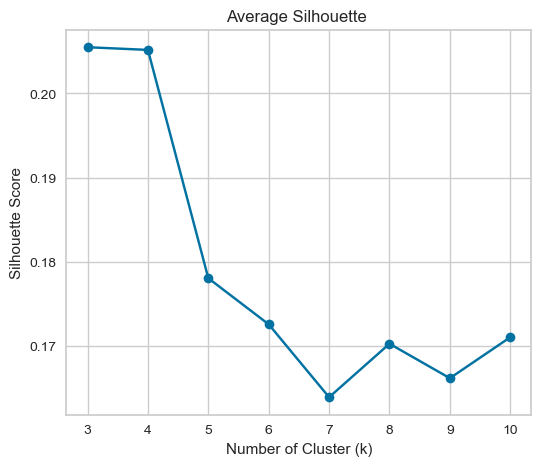

In [366]:
from sklearn.metrics import calinski_harabasz_score , silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_range = range( 3 , 11)
silhouette_scores = []

for k in k_range :
    kmeans = KMeans ( n_clusters = k , random_state= 43)
    kmeans.fit(processd_No_classLabel_data)
    silhouette_avg = silhouette_score(processd_No_classLabel_data , kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# plot Average  Silhouette width  
plt.figure(figsize=(6, 5))
   
plt.plot( k_range , silhouette_scores , marker = "o")
plt.title("Average Silhouette ")
plt.xlabel("Number of Cluster (k)")
plt.ylabel("Silhouette Score")


So by performing the Silhouette Score, we estimated the best numbers of clusters that we are going to apply and evaluate later by choosing the clusters that show the highest peeks which are 4 , 6 and 8 

### Applaying K-means clustering algorithm for our chosen K values 

####  K = 4

In [371]:
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 

np.random.seed(43)

kmeans4 = KMeans ( n_clusters = 4 ,random_state = 43)
kmeans_result4 = kmeans4.fit(processd_No_classLabel_data)

print("Cluster centers :")
print(kmeans_result4.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result4.labels_)



Cluster centers :
[[ 1.78612717e+00  3.58381503e-01  3.64454494e-01  2.53256225e-01
   5.83815029e-01  8.38150289e-01  2.40436472e+00  1.23281490e+00
   5.78034682e-02  1.73410405e-02  1.90739191e+00  5.72254335e-01
   7.06724636e-01  7.33517694e-01  1.13872832e+00  3.04046243e+00]
 [ 1.92011834e+00  4.58579882e-01  4.82926281e-01  3.68970028e-01
   7.52958580e-01  8.66863905e-01  2.45819758e+00  3.03399469e+00
   6.06508876e-02  2.07100592e-02  1.98603157e+00  7.73668639e-01
   1.13150515e+00  7.46969926e-01  1.15532544e+00  3.03106509e+00]
 [ 1.42424242e+00  7.87878788e-01  5.92042350e-01  2.00348849e-01
   5.00000000e-01  9.39393939e-01  2.37542855e+00  3.39011676e+00
   4.54545455e-02  3.03030303e-02  1.88954038e+00  7.57575758e-01
   1.53062880e+00  6.97246409e-01  1.15151515e+00  3.03030303e-02]
 [ 3.70930233e+00  6.86046512e-01  5.50867456e-01  4.61964548e-01
   8.48837209e-01  9.30232558e-01  2.47586778e+00  2.65384876e+00
   2.08166817e-17  2.32558140e-02  1.96189895e+00  9.06

####  K = 6


In [374]:
np.random.seed(43)

kmeans6 = KMeans ( n_clusters = 6 ,random_state = 43)
kmeans_result6 = kmeans6.fit(processd_No_classLabel_data)

print("Cluster centers :")
print(kmeans_result6.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result6.labels_)

Cluster centers :
[[ 1.78125000e+00  3.37500000e-01  3.55439048e-01  2.44654343e-01
   5.81250000e-01  8.37500000e-01  2.41365488e+00  1.18536582e+00
   5.62500000e-02  1.87500000e-02  1.88914066e+00  5.50000000e-01
   6.89790950e-01  7.17384262e-01  1.15000000e+00  3.03750000e+00]
 [ 1.45275591e+00  4.68503937e-01  4.43040286e-01  2.41951139e-01
   6.92913386e-01  8.46456693e-01  2.19291508e+00  3.02920020e+00
   7.48031496e-02  7.87401575e-03  1.72435618e+00  6.49606299e-01
   6.39026039e-01  8.57125303e-01  1.23228346e+00  3.02755906e+00]
 [ 1.42424242e+00  7.87878788e-01  5.92042350e-01  2.00348849e-01
   5.00000000e-01  9.39393939e-01  2.37542855e+00  3.39011676e+00
   4.54545455e-02  3.03030303e-02  1.88954038e+00  7.57575758e-01
   1.53062880e+00  6.97246409e-01  1.15151515e+00  3.03030303e-02]
 [ 3.70930233e+00  6.86046512e-01  5.50867456e-01  4.61964548e-01
   8.48837209e-01  9.30232558e-01  2.47586778e+00  2.65384876e+00
   3.46944695e-17  2.32558140e-02  1.96189895e+00  9.06

####  K = 8

In [377]:
np.random.seed(43)

kmeans8 = KMeans ( n_clusters = 8 ,random_state = 43)
kmeans_result8 = kmeans8.fit(processd_No_classLabel_data)

print("Cluster centers :")
print(kmeans_result8.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result8.labels_)

Cluster centers :
[[ 1.72847682e+00  3.04635762e-01  3.39969229e-01  2.38132302e-01
   5.43046358e-01  8.34437086e-01  2.42916279e+00  1.18451907e+00
   5.96026490e-02  1.98675497e-02  1.89073942e+00  5.23178808e-01
   6.43646245e-01  7.16957106e-01  1.15231788e+00  3.03311258e+00]
 [ 1.59296482e+00  6.63316583e-01  4.95232338e-01  3.19113471e-01
   7.33668342e-01  8.64321608e-01  2.18834716e+00  2.91487832e+00
   4.02010050e-02  5.02512563e-03  2.01511672e+00  8.44221106e-01
   5.58724960e-01  8.37500829e-01  1.05527638e+00  3.03015075e+00]
 [ 1.42424242e+00  7.87878788e-01  5.92042350e-01  2.00348849e-01
   5.00000000e-01  9.39393939e-01  2.37542855e+00  3.39011676e+00
   4.54545455e-02  3.03030303e-02  1.88954038e+00  7.57575758e-01
   1.53062880e+00  6.97246409e-01  1.15151515e+00  3.03030303e-02]
 [ 2.74576271e+00  7.62711864e-02  3.84610128e-01  4.98614203e-01
   9.15254237e-01  9.66101695e-01  2.93564094e+00  3.03431623e+00
   2.77555756e-17  1.69491525e-02  2.13649275e+00  9.23

### Clustering Evaluation and Visualization

### Elbow method

 Elbow Method is commonly used to help validate the optimal number of clusters in K-means clustering.

Note: you may need to restart the kernel to use updated packages.


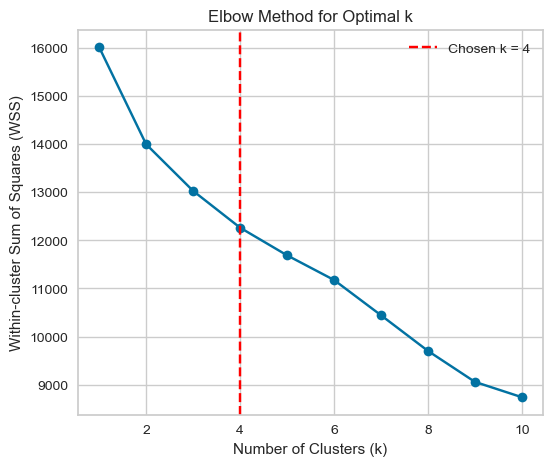

In [382]:
%pip install Kneed 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import make_pipeline 
from sklearn.metrics import silhouette_samples, silhouette_score
from kneed import KneeLocator

# Perform k-means clustering for different values of k 
wss_values = []
k_values = range(1, 11) 
for k in k_values: 
    kmeans = make_pipeline(StandardScaler(), KMeans (n_clusters=k , random_state=43))
    kmeans.fit (processd_No_classLabel_data) 
    wss_values.append (kmeans.named_steps ['kmeans'].inertia_) 

#plot elbow methd
plt.figure(figsize=(6, 5))

plt.plot (k_values, wss_values, marker='o') 
plt.xlabel( 'Number of Clusters (k)') 
plt.ylabel('Within-cluster Sum of Squares (WSS)') 
plt.title('Elbow Method for Optimal k') 
plt.axvline(x=4, linestyle = '--', color='red', label='Chosen k = 4') 
plt.legend() 

plt.show()

- Although k = 3 was initially considered, it was not selected as the optimal value based on the analysis of the Silhouette Score. Instead, k = 4 was chosen as the most appropriate value since it is the nearest to k = 3 and corresponds to the highest peak observed in the Silhouette Score. This aligns with the insights from both the Elbow and Silhouette methods, where k = 4 also shows a favorable WSS value compared to the other k values.
- 
While k = 6 and k = 8 showed some improvement in cluster quality, their WSS values were less favorable compared to k = 4, and they did not exhibit a clear drop in values. Although these higher values of k could offer some improvement in clustering, they risk over-dividing natural groupings, which may result in clusters with less distinction or meaning. Therefore, until now k = 4 come up withthe most optimal value, balancing the WSS reduction, Silhouette Score peak, and overall cluster integrity.

### Silhouette Coefficient Method 

Calculated for each data point shows how well that specific point is clustered:
- values close to 1 indicating that the point is well-clustered
- values around 0 indicating overlapping clusters
- negative values suggesting possible misclassification.

In [386]:
%pip install yellowbrick 

Note: you may need to restart the kernel to use updated packages.


####  K = 4

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


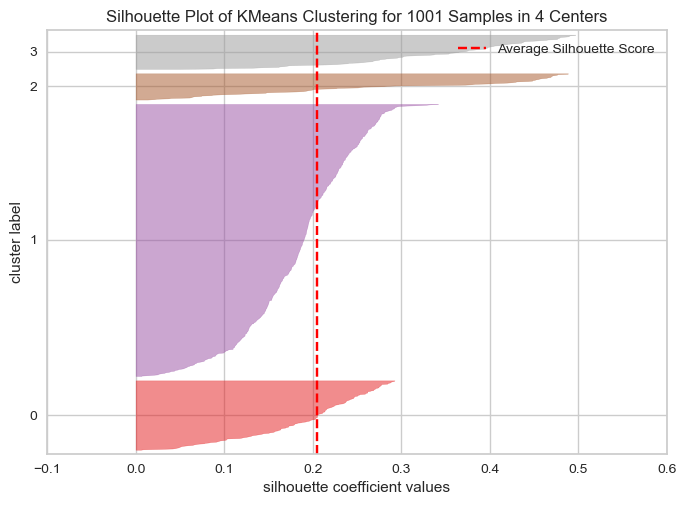

The average silhouette score is : 0.20517478890010027


In [388]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer4 = SilhouetteVisualizer(kmeans4 , color="yellowbrick")
visualizer4.fit(processd_No_classLabel_data)
visualizer4.show()
print("The average silhouette score is :", visualizer4.silhouette_score_ )


In the clustering solution with k = 4, the Silhouette plot shows that most points have positive scores, indicating that samples are generally well-separated from neighboring clusters. This configuration provides a balance between distinct clustering and a manageable number of clusters. Although some points have scores close to zero, suggesting minor overlap in certain areas, this clustering structure achieves reasonable separation between clusters and seems to effectively capture the natural grouping in the dataset.

####  K = 6

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


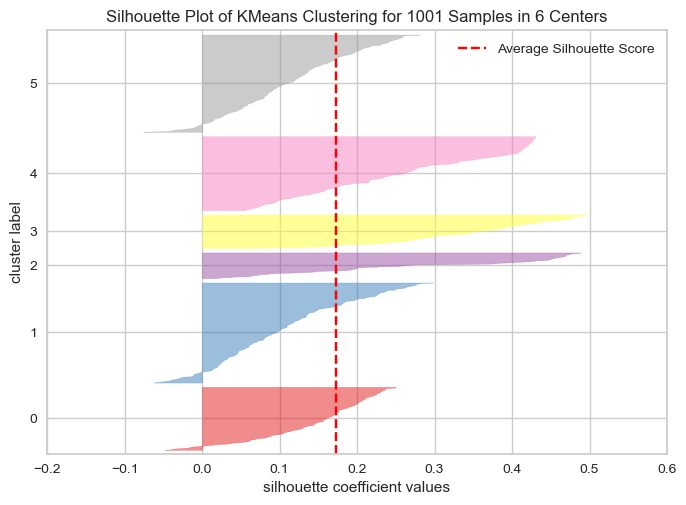

The average silhouette score is : 0.1725708165987399


In [391]:
from yellowbrick.cluster import SilhouetteVisualizer

visualizer6 = SilhouetteVisualizer(kmeans6 , color="yellowbrick")
visualizer6.fit(processd_No_classLabel_data)
visualizer6.show()
print("The average silhouette score is :", visualizer6.silhouette_score_ )

With k = 6 clusters, the Silhouette plot still displays mostly positive scores, reinforcing that many points are well-matched to their clusters. However, the slight increase in negative scores for some clusters suggests that a few points are closer to neighboring clusters, indicating potential overlap or ambiguity. This configuration appears to offer slightly less clarity in cluster separation compared to k = 4.


####  K = 8

C:\Users\Fahad\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


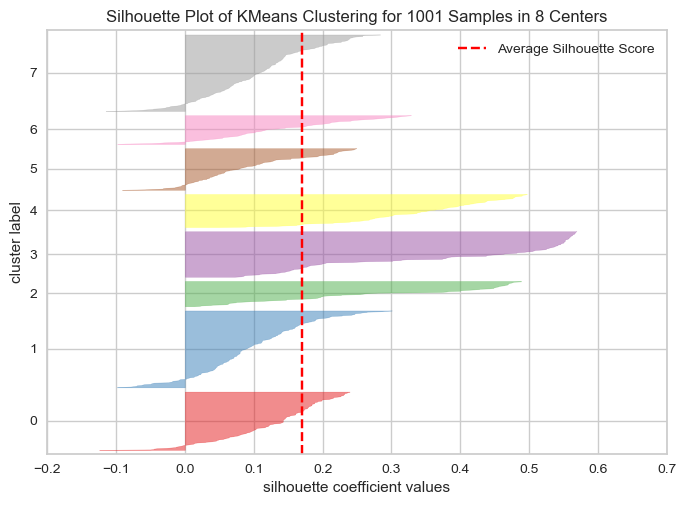

The average silhouette score is : 0.1702648476545555


In [394]:
visualizer8 = SilhouetteVisualizer(kmeans8 , color="yellowbrick")
visualizer8.fit(processd_No_classLabel_data)
visualizer8.show()
print("The average silhouette score is :", visualizer8.silhouette_score_ )

In the k = 8 configuration, the positive Silhouette scores suggest that the clustering solution still maintains reasonable separation between clusters. However, there is an indication that the clustering structure becomes less distinct with this higher number of clusters, as the average score decreases slightly. This may imply that dividing the data into more clusters does not yield significant improvements in separation and could lead to smaller, less cohesive clusters.

### Choosing the Best Clustering Model

|                          |  K=4    |   K=6   |   K=8   |
|  ----------------------- |-------  |-------- | --------|
| WSS                      | 3622.19 | 2944.93 | 2687.70 |
| Average Silhouette Score | 0.2052  | 0.1726  |  0.1703 |




We've decided that K = 4 is the most suitable choice for our clustering model based on a comprehensive analysis of the WSS, Average Silhouette Score, and K-means clustering visualization: 

- Wherr K = 6 and K = 8 show lower WSS values (indicating more compact clusters), this can occur when you increase k too much, leading to artificially compact clusters that don’t necessarily represent meaningful groupings in the data.
  
- The Average Silhouette Score for K = 4 is higher than for K = 6 and K = 8, indicating better overall cluster cohesion and separation. K = 4 strikes the best balance between reducing WSS while maintaining a strong Average Silhouette Score, which is crucial for identifying meaningful cluster structures.

- Visual inspection of the clustering results supports K = 4 as the optimal choice. The Silhouette plot for K = 4 shows more distinct and cohesive clusters than K = 6 or K = 8, which suffer from over-dividing natural groupings and less distinction between clusters.

<b> Therefore, K = 4 is selected as the best value for clustering, providing a good combination of compactness, separation, and overall cluster quality. </b>